# Predicting Stroke with machine learning

## Data Collection

In [767]:
import numpy as np #for computing with array objects
import pandas as pd # data structures and data analysis
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import platform
import sys

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler # Feature Scaling
from sklearn.preprocessing import OneHotEncoder # e.g. {1,0,0,0}, {0,1,0,0}
from sklearn.preprocessing import LabelEncoder # e.g. {"no" : 0, "yes" : 1}
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, fbeta_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']= 14, 8
RANDOM_SEED= 42
LABELS = ["No Stroke","Stroke"]

In [768]:
import sys
!{sys.executable} -m pip install <scikit-learn>

The syntax of the command is incorrect.


In [769]:
from imblearn import under_sampling, over_sampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter

In [770]:
# location of the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
#first 5 lines of data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [771]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Visualisation

In [772]:
#rows and columns in the dataset:
df.shape

(5110, 12)

In [773]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [774]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop(['id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


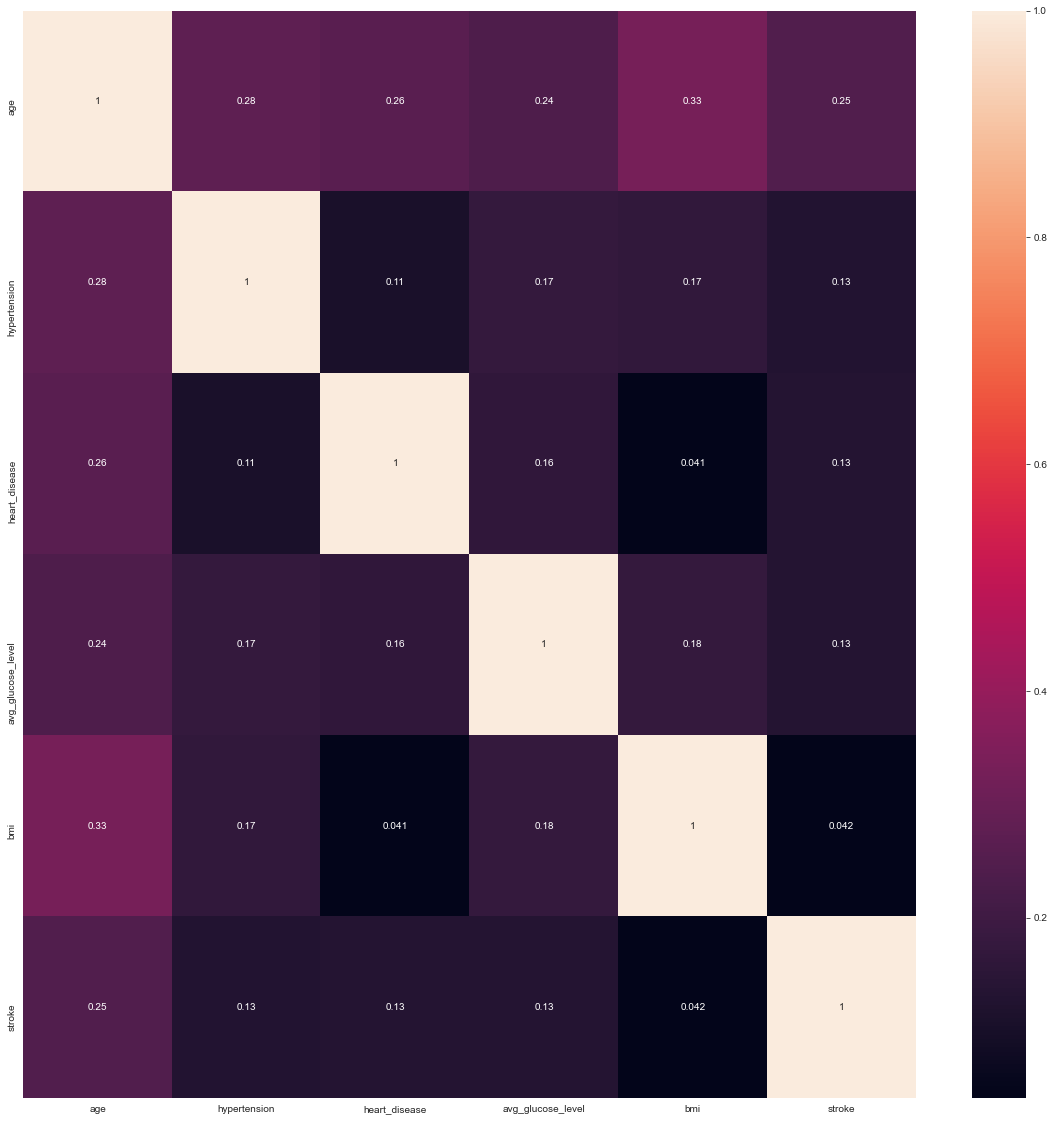

In [775]:
#visualising the feature correlation in the dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

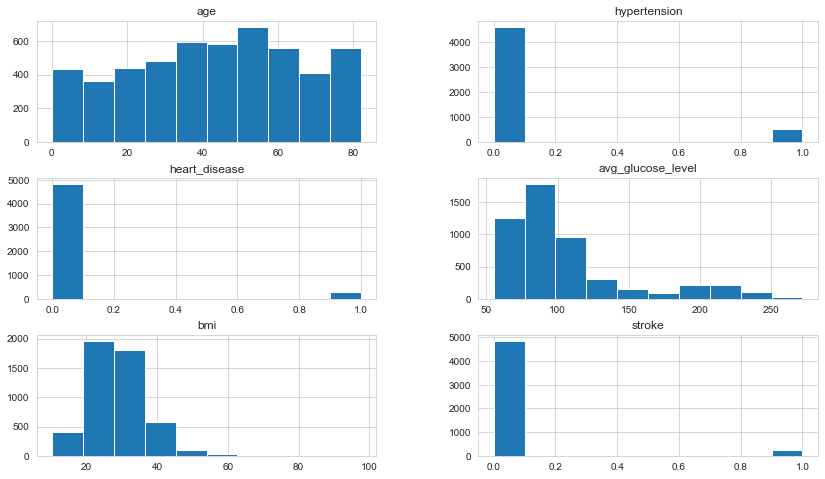

In [776]:
#data distrubution 
df.hist()

<AxesSubplot:>

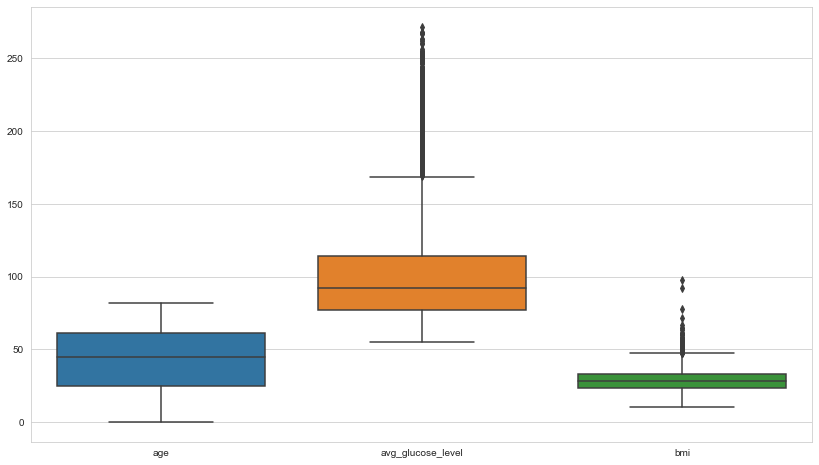

In [777]:
sns.boxplot(data = df[['age', 'avg_glucose_level','bmi']])

<AxesSubplot:xlabel='stroke', ylabel='count'>

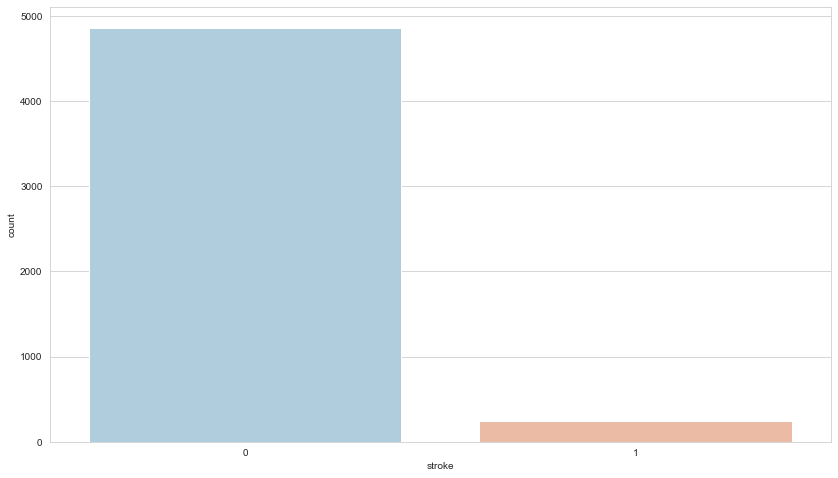

In [778]:
# visualize the target variable
sns.set_style('whitegrid')
sns.countplot(x='stroke', data=df, palette='RdBu_r')

## Data Pre-processing

### Handling Missing Values

In [779]:
#finding the null values:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [780]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [781]:
#filling missing values with average value
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [782]:
#checking if there still any missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### Handling Imbalanced Dataset using Oversampling

In [783]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["stroke"]]
# Store the variable we are predicting 
target = "stroke"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(5110, 10)
(5110,)


In [784]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

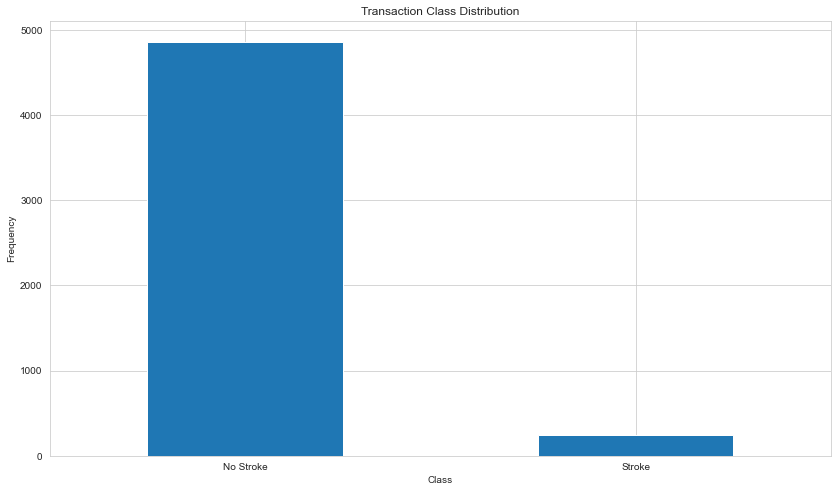

In [785]:
count_classes = pd.value_counts(df['stroke'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

C:\Users\gitan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

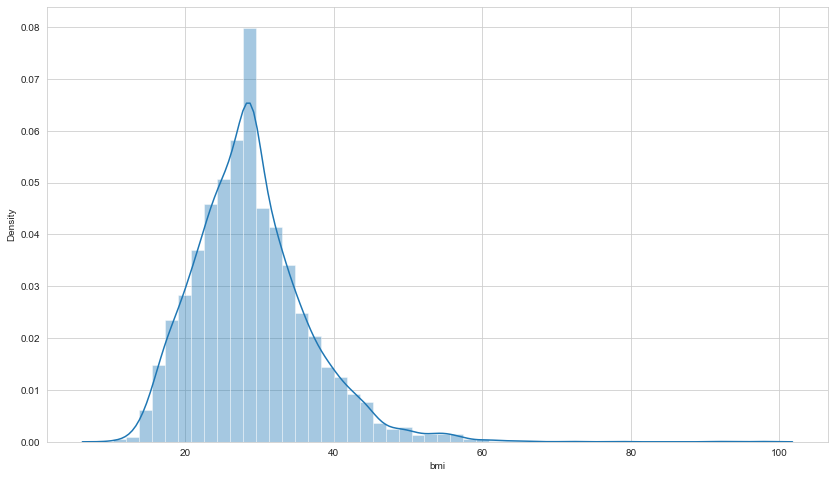

In [786]:
sns.distplot(df['bmi'])


In [787]:
#replace gender == 'other'
df['gender'].value_counts()
df['gender'] = df['gender'].replace(to_replace='Other', value='Female')
df['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [788]:
#Rounding Age

df['age'] = df['age'].apply(lambda x: round(x))
df['age']

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

### Converting Categorical Data into Numbers

In [789]:
# checking for unique values in each columns
print("gender: ", df['gender'].unique())
print("ever_married: ", df['ever_married'].unique())
print("work_type: ", df['work_type'].unique())
print("Residence_type: ", df['Residence_type'].unique())
print("smoking_status: ", df['smoking_status'].unique())

gender:  ['Male' 'Female']
ever_married:  ['Yes' 'No']
work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type:  ['Urban' 'Rural']
smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [790]:
# Creating a list of features to dummy
todummy_list = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [791]:
# pandas get_dummies: maps each category to 0 (cold) or 1 (hot) = one hot encoder

#1. Gender
gender = df["gender"] # series 
gender_encoded = pd.get_dummies(gender, prefix='')

print(gender[:10]) # original version 
print(gender_encoded[:10]) # encoded numbers for categories 

0      Male
1    Female
2      Male
3    Female
4    Female
5      Male
6      Male
7    Female
8    Female
9    Female
Name: gender, dtype: object
   _Female  _Male
0        0      1
1        1      0
2        0      1
3        1      0
4        1      0
5        0      1
6        0      1
7        1      0
8        1      0
9        1      0


In [792]:
# Work type
workType = df["work_type"]
workType_encoded = pd.get_dummies(workType, prefix='')

print(workType[:10]) 
print(workType_encoded[:10])

0          Private
1    Self-employed
2          Private
3          Private
4    Self-employed
5          Private
6          Private
7          Private
8          Private
9          Private
Name: work_type, dtype: object
   _Govt_job  _Never_worked  _Private  _Self-employed  _children
0          0              0         1               0          0
1          0              0         0               1          0
2          0              0         1               0          0
3          0              0         1               0          0
4          0              0         0               1          0
5          0              0         1               0          0
6          0              0         1               0          0
7          0              0         1               0          0
8          0              0         1               0          0
9          0              0         1               0          0


In [793]:
# Smoking status
smokingStatus = df["smoking_status"]
smokingStatus_encoded = pd.get_dummies(smokingStatus, prefix='')

print(smokingStatus[:10])
print(smokingStatus_encoded[:10]) 

0    formerly smoked
1       never smoked
2       never smoked
3             smokes
4       never smoked
5    formerly smoked
6       never smoked
7       never smoked
8            Unknown
9            Unknown
Name: smoking_status, dtype: object
   _Unknown  _formerly smoked  _never smoked  _smokes
0         0                 1              0        0
1         0                 0              1        0
2         0                 0              1        0
3         0                 0              0        1
4         0                 0              1        0
5         0                 1              0        0
6         0                 0              1        0
7         0                 0              1        0
8         1                 0              0        0
9         1                 0              0        0


In [794]:
# Ever Married
everMarried = df["ever_married"]
everMarried_encoded = pd.get_dummies(everMarried, prefix='')

print(everMarried[:10])
print(everMarried_encoded[:10]) 

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7     No
8    Yes
9    Yes
Name: ever_married, dtype: object
   _No  _Yes
0    0     1
1    0     1
2    0     1
3    0     1
4    0     1
5    0     1
6    0     1
7    1     0
8    0     1
9    0     1


In [795]:
# Residence type
residenceType = df["Residence_type"]
residenceType_encoded = pd.get_dummies(residenceType, prefix='')

print(residenceType[:10])
print(residenceType_encoded[:10]) 

0    Urban
1    Rural
2    Rural
3    Urban
4    Rural
5    Urban
6    Rural
7    Urban
8    Rural
9    Urban
Name: Residence_type, dtype: object
   _Rural  _Urban
0       0       1
1       1       0
2       1       0
3       0       1
4       1       0
5       0       1
6       1       0
7       0       1
8       1       0
9       0       1


### Splitting the Data into Test and Train

X is the feature and Y is the target variable:

X ---train_X,test_X 70/30
Y ---train_Y,test_Y

In [796]:
# Take the numerical data from the original data
X_num = df[['age', 'hypertension', 'heart_disease','avg_glucose_level','bmi','stroke']].copy()
X_num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67,0,1,228.69,36.600000,1
1,61,0,0,202.21,28.893237,1
2,80,0,1,105.92,32.500000,1
3,49,0,0,171.23,34.400000,1
4,79,1,0,174.12,24.000000,1


In [797]:
# Take the encoded data and add to numerical data
X= pd.concat([X_num, gender_encoded, workType_encoded, smokingStatus_encoded, 
                     everMarried_encoded, residenceType_encoded], axis = 1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,_Female,_Male,_Govt_job,_Never_worked,...,_Self-employed,_children,_Unknown,_formerly smoked,_never smoked,_smokes,_No,_Yes,_Rural,_Urban
0,67,0,1,228.69,36.600000,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,61,0,0,202.21,28.893237,1,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
2,80,0,1,105.92,32.500000,1,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,49,0,0,171.23,34.400000,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,79,1,0,174.12,24.000000,1,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0


In [798]:
## Get the stroke and no stroke dataset 

stroke = df[df['stroke']==1]

no_stroke = df[df['stroke']==0]

In [799]:
print(stroke.shape,no_stroke.shape)

(249, 11) (4861, 11)


In [800]:
# Implementing Oversampling for Handling Imbalanced using SMOTETomek
from imblearn.combine import SMOTETomek
counter = Counter(Y)
print('Before', counter)
#oversampling the train dataset using SMOTE
smtom = SMOTETomek(random_state=42)
#X, Y = smt.fit_resample(X, Y)
X_smtom, Y_smtom = smtom.fit_resample(X.astype('float'), Y)

counter = Counter(Y_smtom)
print('After', counter)
#smk = SMOTETomek(random_state=42)
#X_res,y_res=smk.fit_sample(X,Y)


Before Counter({0: 4861, 1: 249})
After Counter({1: 4827, 0: 4827})


In [801]:
X_smtom.shape, Y_smtom.shape

((9654, 21), (9654,))

In [802]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_smtom)))

Original dataset shape Counter({0: 4861, 1: 249})
Resampled dataset shape Counter({1: 4827, 0: 4827})


In [803]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(sampling_strategy=1)

In [804]:
X_train_res, Y_train_res = os.fit_resample(X, Y)

In [805]:
X_train_res.shape,Y_train_res.shape

((9722, 21), (9722,))

In [806]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_train_res)))

Original dataset shape Counter({0: 4861, 1: 249})
Resampled dataset shape Counter({1: 4861, 0: 4861})


In [807]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(sampling_strategy=1)

X_train_res1, Y_train_res1 = os_us.fit_resample(X, Y)

In [808]:
X_train_res1.shape,Y_train_res1.shape

((9652, 21), (9652,))

In [809]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 4861, 1: 249})
Resampled dataset shape Counter({'stroke': 1})


In [810]:
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_smtom.shape}''')

print('\nBalance of positive and negative classes (%):')
Y_smtom.value_counts(normalize=True) * 100

Shape of X before SMOTE: (5110, 21)
Shape of X after SMOTE: (9654, 21)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: stroke, dtype: float64

In [811]:
# visualize the target variable
#sns.set_style('whitegrid')
#sns.countplot(x='stroke', data=df, palette='RdBu_r')

In [812]:
X_smtom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9654 entries, 0 to 9653
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9654 non-null   float64
 1   hypertension       9654 non-null   float64
 2   heart_disease      9654 non-null   float64
 3   avg_glucose_level  9654 non-null   float64
 4   bmi                9654 non-null   float64
 5   stroke             9654 non-null   float64
 6   _Female            9654 non-null   float64
 7   _Male              9654 non-null   float64
 8   _Govt_job          9654 non-null   float64
 9   _Never_worked      9654 non-null   float64
 10  _Private           9654 non-null   float64
 11  _Self-employed     9654 non-null   float64
 12  _children          9654 non-null   float64
 13  _Unknown           9654 non-null   float64
 14  _formerly smoked   9654 non-null   float64
 15  _never smoked      9654 non-null   float64
 16  _smokes            9654 

In [815]:
# define y as being the "stroke column" from the original dataset
Y_smtom1 = X_smtom[['stroke']].copy()
Y_smtom1.head()
Y_smtom1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9654 entries, 0 to 9653
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stroke  9654 non-null   float64
dtypes: float64(1)
memory usage: 75.5 KB


In [816]:
#X_smtom = pd.read_csv("healthcare-dataset-stroke-data.csv")
X_smtom = X_smtom.drop(['stroke'], axis=1)
X_smtom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9654 entries, 0 to 9653
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9654 non-null   float64
 1   hypertension       9654 non-null   float64
 2   heart_disease      9654 non-null   float64
 3   avg_glucose_level  9654 non-null   float64
 4   bmi                9654 non-null   float64
 5   _Female            9654 non-null   float64
 6   _Male              9654 non-null   float64
 7   _Govt_job          9654 non-null   float64
 8   _Never_worked      9654 non-null   float64
 9   _Private           9654 non-null   float64
 10  _Self-employed     9654 non-null   float64
 11  _children          9654 non-null   float64
 12  _Unknown           9654 non-null   float64
 13  _formerly smoked   9654 non-null   float64
 14  _never smoked      9654 non-null   float64
 15  _smokes            9654 non-null   float64
 16  _No                9654 

In [817]:
Y_smtom1.head()

,stroke
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [818]:
X_smtom.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,_Female,_Male,_Govt_job,_Never_worked,_Private,_Self-employed,_children,_Unknown,_formerly smoked,_never smoked,_smokes,_No,_Yes,_Rural,_Urban
0,67.0,0.0,1.0,228.69,36.600000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [819]:
# splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_smtom, Y_smtom1, test_size=0.25, random_state=42
)

X_train, X_test, Y_train, Y_test=train_test_split(
    X1,Y,test_size=0.3,random_state=0
)

In [820]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,_Female,_Male,_Govt_job,_Never_worked,_Private,_Self-employed,_children,_Unknown,_formerly smoked,_never smoked,_smokes,_No,_Yes,_Rural,_Urban
2602,37.000000,0.000000,0.000000,86.490000,24.400000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000
9148,80.849791,0.000000,0.000000,186.364340,29.090126,0.037552,0.962448,0.037552,0.0,0.962448,0.0,0.0,0.0,0.962448,0.037552,0.000000,0.0,1.0,0.037552,0.962448
1193,64.000000,1.000000,0.000000,78.430000,30.200000,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,1.0,1.000000,0.000000
6421,68.000000,0.962603,0.962603,247.002523,40.571054,0.962603,0.037397,0.000000,0.0,1.000000,0.0,0.0,0.0,0.962603,0.037397,0.000000,0.0,1.0,0.037397,0.962603
5165,59.475243,0.440595,0.440595,207.575003,41.230692,1.000000,0.000000,0.559405,0.0,0.440595,0.0,0.0,0.0,0.559405,0.000000,0.440595,0.0,1.0,0.559405,0.440595


In [821]:
Y_train.head()

,stroke
2602,0.0
9148,1.0
1193,0.0
6421,1.0
5165,1.0


### Feature scaling

In [822]:
s_sc = StandardScaler()

In [823]:
X_train = s_sc.fit_transform(X_train.astype(np.float))

In [824]:
X_test= s_sc.transform(X_test.astype(np.float))

## Choosing a model and two baselines

The main model applied to this dataset is: Random Forest
The two baselines chosen for the comparison are: Support Vector Machine and K-nearest necighbor

## Training the Models

### 1. Random Forest

Random Forest:Accuracy train score: 1.00000, test score: 0.96852
Cross Validation score:  0.9732044198895029
Precision score of RF: 0.988495575221239
recall score of RF: 0.9466101694915254
F1 score of RF: 0.9670995670995672


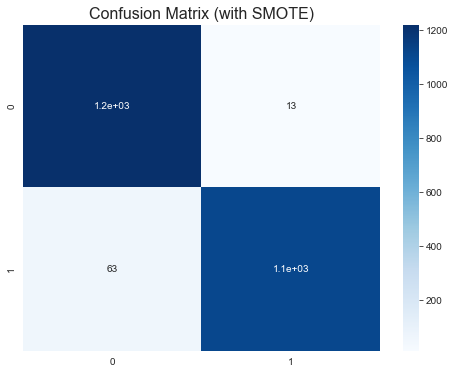

In [826]:
rf = RandomForestClassifier()

#fit model
rf = rf.fit(X_train,Y_train.values.ravel())

#print score
print('Random Forest:Accuracy train score: %.5f, test score: %.5f' % (
rf.score(X_train,Y_train),
rf.score(X_test, Y_test)))

rf_cv = cross_val_score(rf, X_train,Y_train,n_jobs =-1, cv=20)
print("Cross Validation score: ", rf_cv.mean())

rf_predictions = rf.predict(X_test)

f1 = f1_score(Y_test, rf_predictions)
precision=precision_score(Y_test, rf_predictions)
recall=recall_score(Y_test, rf_predictions)

print("Precision score of RF:", precision)
print("recall score of RF:", recall)
print("F1 score of RF:", f1)

cm = confusion_matrix(Y_test, rf_predictions)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

### 2. Support Vector Machine (SVM)

SVM Accuracy: train score: 0.94185, test score: 0.93248
Cross Validation score:  0.9298342541436465
Precision score of SVM: 0.9356715558054393
recall score of SVM: 0.9315811883635965
F1 score of SVM: 0.9322258980565425


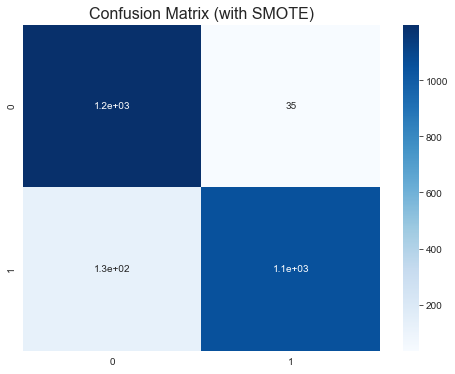

In [825]:
svm = SVC(probability=True, random_state=42)

#fit model
svm = svm.fit(X_train,Y_train.values.ravel())

#print score
print('SVM Accuracy: train score: %.5f, test score: %.5f' % (
svm.score(X_train,Y_train),
svm.score(X_test, Y_test)))

svm_cv = cross_val_score(svm, X_train,Y_train,n_jobs =-1, cv=20)
print("Cross Validation score: ", svm_cv.mean())


svm_predictions = svm.predict(X_test)

f1 = f1_score(Y_test, svm_predictions, average = "macro")
precision=precision_score(Y_test, svm_predictions, average = "macro")
recall=recall_score(Y_test, svm_predictions, average = "macro")

print("Precision score of SVM:", precision)
print("recall score of SVM:", recall)
print("F1 score of SVM:", f1)

cm = confusion_matrix(Y_test, svm_predictions)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

### 3. K-Nearest Neighbour

KNN Accuracy: train score 0.95594, test score: 0.92833
Cross Validation score:  0.9232044198895026
Precision score of K-nearest Neighbor: 0.8900077459333849
recall score of K-nearest Neighbor: 0.9737288135593221
F1 score of K-nearest Neighbor: 0.9299878591663294


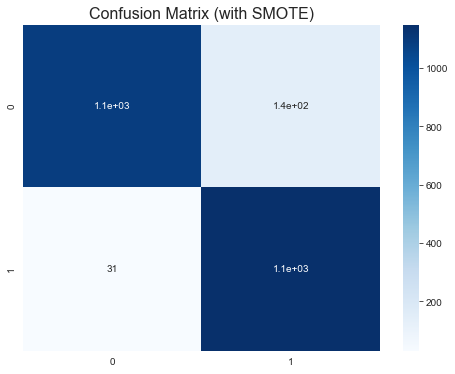

In [857]:
knn=KNeighborsClassifier()

#fit model
knn = knn.fit(X_train,Y_train.values.ravel())

#print score
print('KNN Accuracy: train score %.5f, test score: %.5f' % (
knn.score(X_train,Y_train),
knn.score(X_test, Y_test)))

knn_cv = cross_val_score(knn, X_train,Y_train,n_jobs =-1, cv=20)
print("Cross Validation score: ", knn_cv.mean())

knn_predictions = knn.predict(X_test)

f1 = f1_score(Y_test, knn_predictions)
precision=precision_score(Y_test, knn_predictions)
recall=recall_score(Y_test, knn_predictions)

print("Precision score of K-nearest Neighbor:", precision)
print("recall score of K-nearest Neighbor:", recall)
print("F1 score of K-nearest Neighbor:", f1)

cm = confusion_matrix(Y_test, knn_predictions)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [828]:
print('All Results: ')
svm_cv = cross_val_score(svm, X_train,Y_train,n_jobs =-1, cv=20)
print("SVM Cross Validation score: ", svm_cv.mean())
print('')
rf_cv = cross_val_score(rf, X_train,Y_train,n_jobs =-1, cv=20)
print("RF Cross Validation score: ", rf_cv.mean())
print('')
knn_cv = cross_val_score(knn, X_train,Y_train,n_jobs =-1, cv=20)
print("KNN Cross Validation score: ", knn_cv.mean())

All Results: 
SVM Cross Validation score:  0.9298342541436465

RF Cross Validation score:  0.9733425414364643

KNN Cross Validation score:  0.9232044198895026


### 4. Logistic Regression

In [829]:
lr = LogisticRegression()
logr= LogisticRegression()

#fit model
lr = lr.fit(X_train,Y_train.values.ravel())

#print score
print('Logistic Regression: train score %.5f, test score: %.5f' % (
lr.score(X_train,Y_train),
lr.score(X_test, Y_test)))

lr_cv = cross_val_score(lr, X_train,Y_train,n_jobs =-1, cv=20)
print("Cross Validation score: ", lr_cv.mean())

Logistic Regression: train score 0.78743, test score: 0.81193
Cross Validation score:  0.7875690607734807


In [830]:
logr.fit(X_train,Y_train)
Y_pred_logr = logr.predict(X_test)
Y_pred_logr

C:\Users\gitan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0., 1., 0., ..., 0., 1., 0.])

In [831]:
ac_logr=accuracy_score(Y_test,Y_pred_logr)
ac_logr

0.8119304059652029

## Model Tuning

### Random Forest Hyperparameter Tuning

#### Grid search

In [840]:
# Best parametars 
param_grid = { "criterion" : ["gini", "entropy"], 
              "n_estimators": [20, 30, 40, 50, 100, 150],
              "max_depth": [2, 4, 10, 12, 14, 16], 
              "min_samples_leaf" : [2, 4, 6, 8, 10],
                "max_features": ['auto', 'sqrt', 'log2']}

gs = GridSearchCV(RandomForestClassifier(), 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5, 
                  n_jobs=-1)

gs = gs.fit(X_train,Y_train.values.ravel())

print(gs.best_score_)
print(gs.best_params_)

0.973342541436464
{'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}


In [841]:
rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=30,
                             max_depth=14,
                             min_samples_leaf=2,
                             max_features='auto',                           
                            )

#fit model
rf = rf.fit(X_train,Y_train.values.ravel())

#print score
print('Random Forest Accuracy: train score: %.5f, test score: %.5f' % (
rf.score(X_train,Y_train),
rf.score(X_test, Y_test)))

rf_cv = cross_val_score(rf, X_train,Y_train,n_jobs =-1, cv=20)
print("Cross Validation score: ", rf_cv.mean())

rfY_predict = rf.predict(X_test)

precision=precision_score(Y_test, rfY_predict, average = "macro")
recall=recall_score(Y_test, rfY_predict, average = "macro")

#harmonic mean of precision and recall
f1 = f1_score(Y_test,rfY_predict, average = "macro")

# precision more weight than recall (beta < 1)
#fbeta = fbeta_score(Y_test, SVM_predict, beta = 0.5)

# recall more weight than precision (beta >1)
#fbeta1 = fbeta_score(Y_test, SVM_predict, beta = 2)

print("Precision score of RF:", precision)
print("recall score of RF:", recall)
print("F1 score of RF:", f1)
#print("fbeta score of SVM:", fbeta)
#print("fbeta1 score of SVM:", fbeta1)

Random Forest Accuracy: train score: 0.98232, test score: 0.96686
Cross Validation score:  0.9718232044198896
Precision score of RF: 0.9686807937217998
recall score of RF: 0.9662500343378293
F1 score of RF: 0.966780608902907


In [842]:
#confusion matrix
#confusion_matrix(y_true= Y_test, y_pred = predict)

confusion_matrix(Y_test, rfY_predict, labels= (0,1))

#tp, fn, fp, tn = confusion_matrix(Y_test, predict, labels=(1,0)).ravel()

array([[1226,    8],
       [  72, 1108]], dtype=int64)

#### Evaluation

In [844]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, rfY_predict))


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1234
         1.0       0.99      0.94      0.97      1180

    accuracy                           0.97      2414
   macro avg       0.97      0.97      0.97      2414
weighted avg       0.97      0.97      0.97      2414



In [852]:
matthews_corrcoef(Y_test, rfY_predict)

0.9349276681460875

### SVM Hyperparameter tuning

#### Grid search

In [832]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
gs.fit(X_train,Y_train.values.ravel()) 



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.3s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.3s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.3s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.4s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.4s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.3s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.7s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.8s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [833]:
# print best parameter after tuning 
print(gs.best_params_) 

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [834]:
SVM = SVC(kernel= 'rbf', C=0.1, gamma=1)

#fit model
SVM = SVM.fit(X_train,Y_train.values.ravel())

#print score
print('SVM Accuracy: train score %.5f, test score: %.5f' % (
SVM.score(X_train,Y_train),
SVM.score(X_test, Y_test)))

SVM_cv = cross_val_score(SVM, X_train,Y_train,n_jobs =-1, cv=20)
print("Cross Validation score: ", SVM_cv.mean())

SVM_predict = SVM.predict(X_test)

precision=precision_score(Y_test, SVM_predict, average = "macro")
recall=recall_score(Y_test, SVM_predict, average = "macro")

#harmonic mean of precision and recall
f1 = f1_score(Y_test, SVM_predict, average = "macro")

# precision more weight than recall (beta < 1)
#fbeta = fbeta_score(Y_test, SVM_predict, beta = 0.5)

# recall more weight than precision (beta >1)
#fbeta1 = fbeta_score(Y_test, SVM_predict, beta = 2)

print("Precision score of SVM:", precision)
print("recall score of SVM:", recall)
print("F1 score of SVM:", f1)
#print("fbeta score of SVM:", fbeta)
#print("fbeta1 score of SVM:", fbeta1)

SVM Accuracy: train score 0.76285, test score: 0.74027
Cross Validation score:  0.7381215469613259
Precision score of SVM: 0.8121498753802974
recall score of SVM: 0.7455587451583661
F1 score of SVM: 0.7270587429119626


In [835]:
#confusion matrix
#confusion_matrix(y_true= Y_test, y_pred = predict)

confusion_matrix(Y_test, SVM_predict, labels= (0,1))

#tp, fn, fp, tn = confusion_matrix(Y_test, predict, labels=(1,0)).ravel()

array([[ 628,  606],
       [  21, 1159]], dtype=int64)

In [851]:
matthews_corrcoef(Y_test, SVM_predict)

0.5537188156446418

In [837]:
#for roc plot
y_pred_svm = SVM.decision_function(X_test)
print(y_pred_svm)

[-1.06298302  0.92000827 -0.38594482 ...  0.54158309  0.48484212
 -1.19283272]


In [838]:
#from sklearn.metrics import balanced_accuracy_score
#balanced_accuracy_score(Y_test, SVM_predict)

#### Evaluation

In [839]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, SVM_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.51      0.67      1234
         1.0       0.66      0.98      0.79      1180

    accuracy                           0.74      2414
   macro avg       0.81      0.75      0.73      2414
weighted avg       0.82      0.74      0.73      2414



prob= rf.predict_proba(X_test)
prob = prob[:,0]
auc=roc_auc_score(Y_test, prob)
print(auc)
fpr, tpr,thresh=roc_curve(Y_test,prob)
plt_plot([0,1],[0,1])

### K-Nearest Neighbour Hyperparameter Tuning

#### Grid Search

In [845]:
from sklearn.neighbors import KNeighborsClassifier
gs= {'n_neighbors': np.arange(1,25)}

knn = KNeighborsClassifier() 

knn_param_search = GridSearchCV(knn, gs, cv=5)
knn_param_search.fit(X_train,Y_train.values.ravel())


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [846]:
knn_param_search.best_params_

{'n_neighbors': 1}

In [1]:
#print score
print('KNN Accuracy: train score: %.5f, test score: %.5f' % (
knn_param_search.score(X_train,Y_train),
knn_param_search.score(X_test, Y_test)))

knn_cv = cross_val_score(knn_param_search, X_train,Y_train,n_jobs =-1, cv=20)
print("Cross Validation score: ", knn_cv.mean())

knnY_predict = knn_param_search.predict(X_test)

precision=precision_score(Y_test, knnY_predict, average = "macro")
recall=recall_score(Y_test, knnY_predict, average = "macro")

#harmonic mean of precision and recall
f1 = f1_score(Y_test,knnY_predict, average = "macro")

# precision more weight than recall (beta < 1)
#fbeta = fbeta_score(Y_test, SVM_predict, beta = 0.5)

# recall more weight than precision (beta >1)
#fbeta1 = fbeta_score(Y_test, SVM_predict, beta = 2)

print("Precision score of KNN:", precision)
print("recall score of KNN:", recall)
print("F1 score of KNN:", f1)
#print("fbeta score of SVM:", fbeta)
#print("fbeta1 score of SVM:", fbeta1)



NameError: name 'knn_param_search' is not defined

In [848]:
#confusion matrix
#confusion_matrix(y_true= Y_test, y_pred = predict)

r_cm = confusion_matrix(Y_test, knnY_predict, labels= (0,1))
print(r_cm)

#tp, fn, fp, tn = confusion_matrix(Y_test, predict, labels=(1,0)).ravel()

[[1157   77]
 [  14 1166]]


#### Evaluation

In [849]:
knnY_predict = knn_param_search.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(Y_test, knnY_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      1234
         1.0       0.94      0.99      0.96      1180

    accuracy                           0.96      2414
   macro avg       0.96      0.96      0.96      2414
weighted avg       0.96      0.96      0.96      2414



In [853]:
matthews_corrcoef(Y_test, knnY_predict)

0.9259171792701435

## ROC Plot

C:\Users\gitan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-856-14fbbea38e4d>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train) # train the model
C:\Users\gitan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


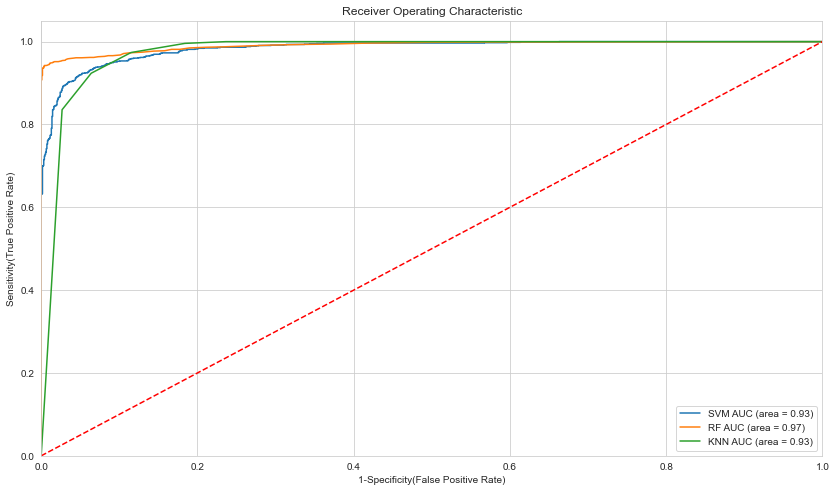

In [856]:
import sklearn.metrics as metrics


plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'SVM',
    'model': SVC(probability=True),
},
{
    'label': 'RF',
    'model': RandomForestClassifier(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, Y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

### Plot ROC and compare AUC

In [854]:
#for roc plot
y_pred_svm = SVM.decision_function(X_test)

#y_pred_rf = rf.decision_function(X_test)

#y_pred_knn = knn.decision_function(X_test)

In [855]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = roc_curve(Y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(Y_test, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

NameError: name 'y_pred_rf' is not defined

#### Random Search

#no. of tree in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 100)]
#no. of features to consider at every split
max_features= ['auto','sqrt']
#max no. of levels in tree
max_depth = [1,20]
#Minimum no. of samples required to split a node
min_samples_split=[2,4,6,8]
#Minimum no. of samples required at each node
min_samples_leaf=[1,2]
# method of selecting samples for training each tree
bootstrap = [True, False]

#create the param grid
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

rf_model = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV
rf_ran_grid = RandomizedSearchCV(estimator= rf_model, param_distributions= param_grid, cv = 10, verbose=2,n_jobs=4)

rf_ran_grid.fit(X_train,Y_train.values.ravel())
rf_ran_grid.best_params_

Check Accuracy

print(f'Train Accuracy - : {rf_ran_grid.score(X_train,Y_train):}')
print(f'Test Accuracy - : {rf_ran_grid.score(X_test,Y_test):}')

iris= df.load_iris()
p = iris.data[:,:2]
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(p, y, random_state=0, test_size = 0.25)

clf = svm.SVC(kernel = 'linear', C=1).fit(x_train, y-train)


h= 0.02
x_min, y_max = x[:,0].min() -1, X[:.0.max() +1]
x_min, y_max = x[:,1].min() -1, X[:.1.max() +1]

xx, yy = ap.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

xx.shape

z= clf.predict(np.c[xx.ravel, yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm, alpha=0.3)

plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.xlim(yy.min(), yy.max())
plt.xtricks(())
plt.ytricks(())
plt.title("Linear")
plt.show()